
**Description**<br>
* Predict youtube views by using statistical numbers or other attributes on the video


In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load and Describe Data

In [75]:
df = pd.read_excel('youtube_statistics.xlsx')
df.sample(1)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
4550,2017-12-08,Durga | Full Ep 935 7th Dec 2017 | Odia Serial...,Tarang TV,24,15:43:14,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",48555,170,38,13,False,False,False,Durga: Story of a revengeful daughter who ente...,15,609,57,2017-12-07


In [76]:
df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

* The description column has a different non-null value from other data
* Some columns needs to be formatted to make it easier for further processing

# Exploratory Data Analysis (EDA)

### Numerical Approach

In [78]:
cats = ['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'description','publish_date']
nums = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']

In [79]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [80]:
df[cats].describe()

,trending_date,title,channel_title,publish_time,tags,description,publish_date
count,36791,36791,36791,36791,36791,36746,36791
unique,205,16431,1390,12375,12463,13979,219
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,199,19,284,333,1120,166,318
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


In [81]:
df.sample(1)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
18734,2018-02-27,THE SHORTCUT - | Elvish Yadav |,Elvish yadav,23,14:14:21,"THE SHORTCUT ELVISH YADAV|""elvish yadav""|""elvi...",1066286,131000,2209,11690,False,False,False,This video basically shows how an illiterate p...,10,406,31,2018-02-24


* Category has a unique value that is hundreds to thousands so that it is potentially difficult to be used as a divider parameter

In [82]:
#df['publish_time'] = pd.to_datetime(df['publish_time'])# format= %Y %m %-d
#df['publish_date'] = df['publish_date'].dt.strftime('%Y-%m-%-d')

#df['publish_at'] = pd.to_datetime(df['publish_date'] + ' ' + df['publish_time'])
#df = df.set_index(['publish_at'])
#del df['publish_date']
#del df['publish_time']

df['trending_date'] = pd.to_datetime(df['trending_date'])# format= %Y %m %-d
df['publish_date'] = df['publish_date'].dt.strftime('%Y-%m-%-d')

pd.to_datetime(df['publish_date'] + ' ' + df['publish_time'])


0       2017-11-12 12:20:39
1       2017-11-13 05:43:56
2       2017-11-12 15:48:08
3       2017-11-12 07:08:48
4       2017-11-13 01:14:16
                ...        
36786   2018-06-13 08:01:11
36787   2018-06-13 11:30:04
36788   2018-06-13 05:00:02
36789   2018-06-13 15:07:49
36790   2018-06-10 04:29:54
Length: 36791, dtype: datetime64[ns]

In [83]:
df['publish_at'] = pd.to_datetime(df['publish_date'] + ' ' + df['publish_time'])
del df['publish_date']
del df['publish_time']

In [84]:
df.publish_at.dt.hour

0        12
1         5
2        15
3         7
4         1
         ..
36786     8
36787    11
36788     5
36789    15
36790     4
Name: publish_at, Length: 36791, dtype: int64

In [85]:
df["comments_disabled"] = df["comments_disabled"].astype(int)
df["ratings_disabled"] = df["ratings_disabled"].astype(int)
df["video_error_or_removed"] = df["video_error_or_removed"].astype(int)

In [86]:
df = df.astype({col: 'int64' for col in df.select_dtypes('int32').columns})

In [87]:
#cats = ['trending_date', 'title', 'channel_title', 'tags', 'description','publish_at']
nums = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
cats = ['trending_date', 'title', 'channel_title', 'tags', 'description','publish_at']
dt   = ['trending_date', 'publish_at']

In [88]:
df[dt].describe()

,trending_date,publish_at
count,36791,36791
unique,205,16053
top,2017-12-23 00:00:00,2018-04-21 13:30:01
freq,199,18
first,2017-11-14 00:00:00,2017-05-27 20:27:30
last,2018-06-14 00:00:00,2018-06-13 18:05:15


In [89]:
df['publish_at']

0       2017-11-12 12:20:39
1       2017-11-13 05:43:56
2       2017-11-12 15:48:08
3       2017-11-12 07:08:48
4       2017-11-13 01:14:16
                ...        
36786   2018-06-13 08:01:11
36787   2018-06-13 11:30:04
36788   2018-06-13 05:00:02
36789   2018-06-13 15:07:49
36790   2018-06-10 04:29:54
Name: publish_at, Length: 36791, dtype: datetime64[ns]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  datetime64[ns]
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   tags                    36791 non-null  object        
 5   views                   36791 non-null  int64         
 6   likes                   36791 non-null  int64         
 7   dislikes                36791 non-null  int64         
 8   comment_count           36791 non-null  int64         
 9   comments_disabled       36791 non-null  int64         
 10  ratings_disabled        36791 non-null  int64         
 11  video_error_or_removed  36791 non-null  int64         
 12  description             36746 non-null  object

In [91]:
df.sample(1)

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_at
28125,2018-04-27,Bharat Ane Nenu - A Blockbuster Promise Promo ...,DVV Entertainments,24,Bharat Ane Nenu - A Blockbuster Promise Promo|...,911802,15032,413,395,0,0,0,Watch Bharat Ane Nenu A Blockbuster Promise Pr...,17,845,96,2018-04-25 04:43:12


In [92]:
#df.iloc[[33025], :]

### Graphical Approach

**Univariate Analysis**

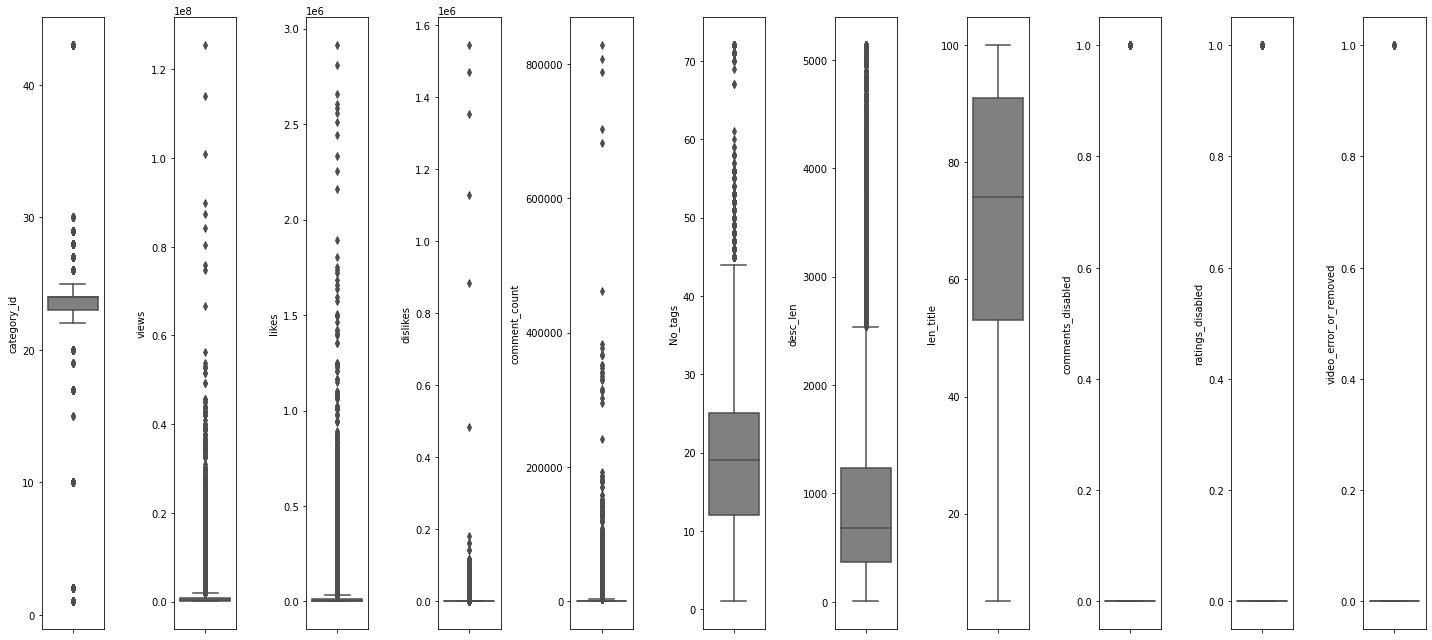

In [93]:
plt.figure(figsize=(20,9))
for col in range (0, len(nums)):
    plt.subplot(1, len(nums), col+1)
    sns.boxplot (y = df[nums[col]], color = 'grey', orient = 'v')
    plt.tight_layout()

**Multivariate Analysis**

<AxesSubplot:>

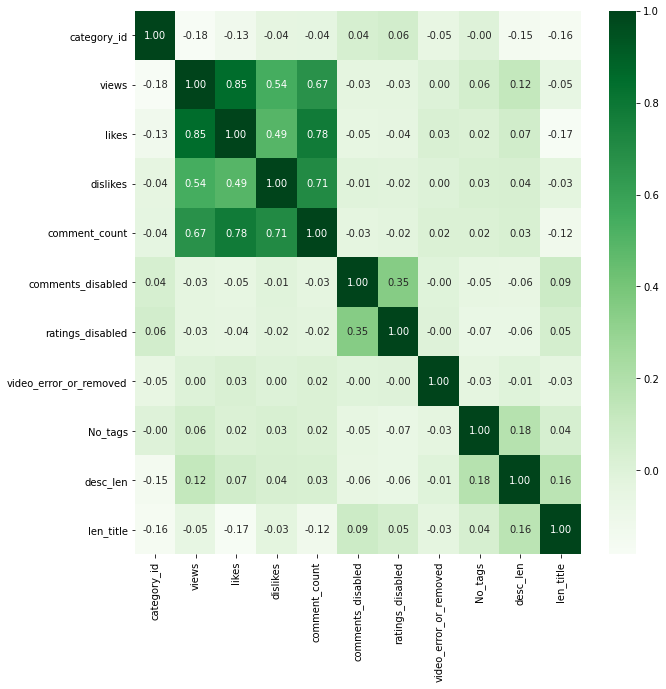

In [94]:
plt.figure (figsize=(10,10))
sns.heatmap (df.corr(), cmap = 'Greens', annot = True, fmt = '.2f')

<Figure size 720x720 with 0 Axes>

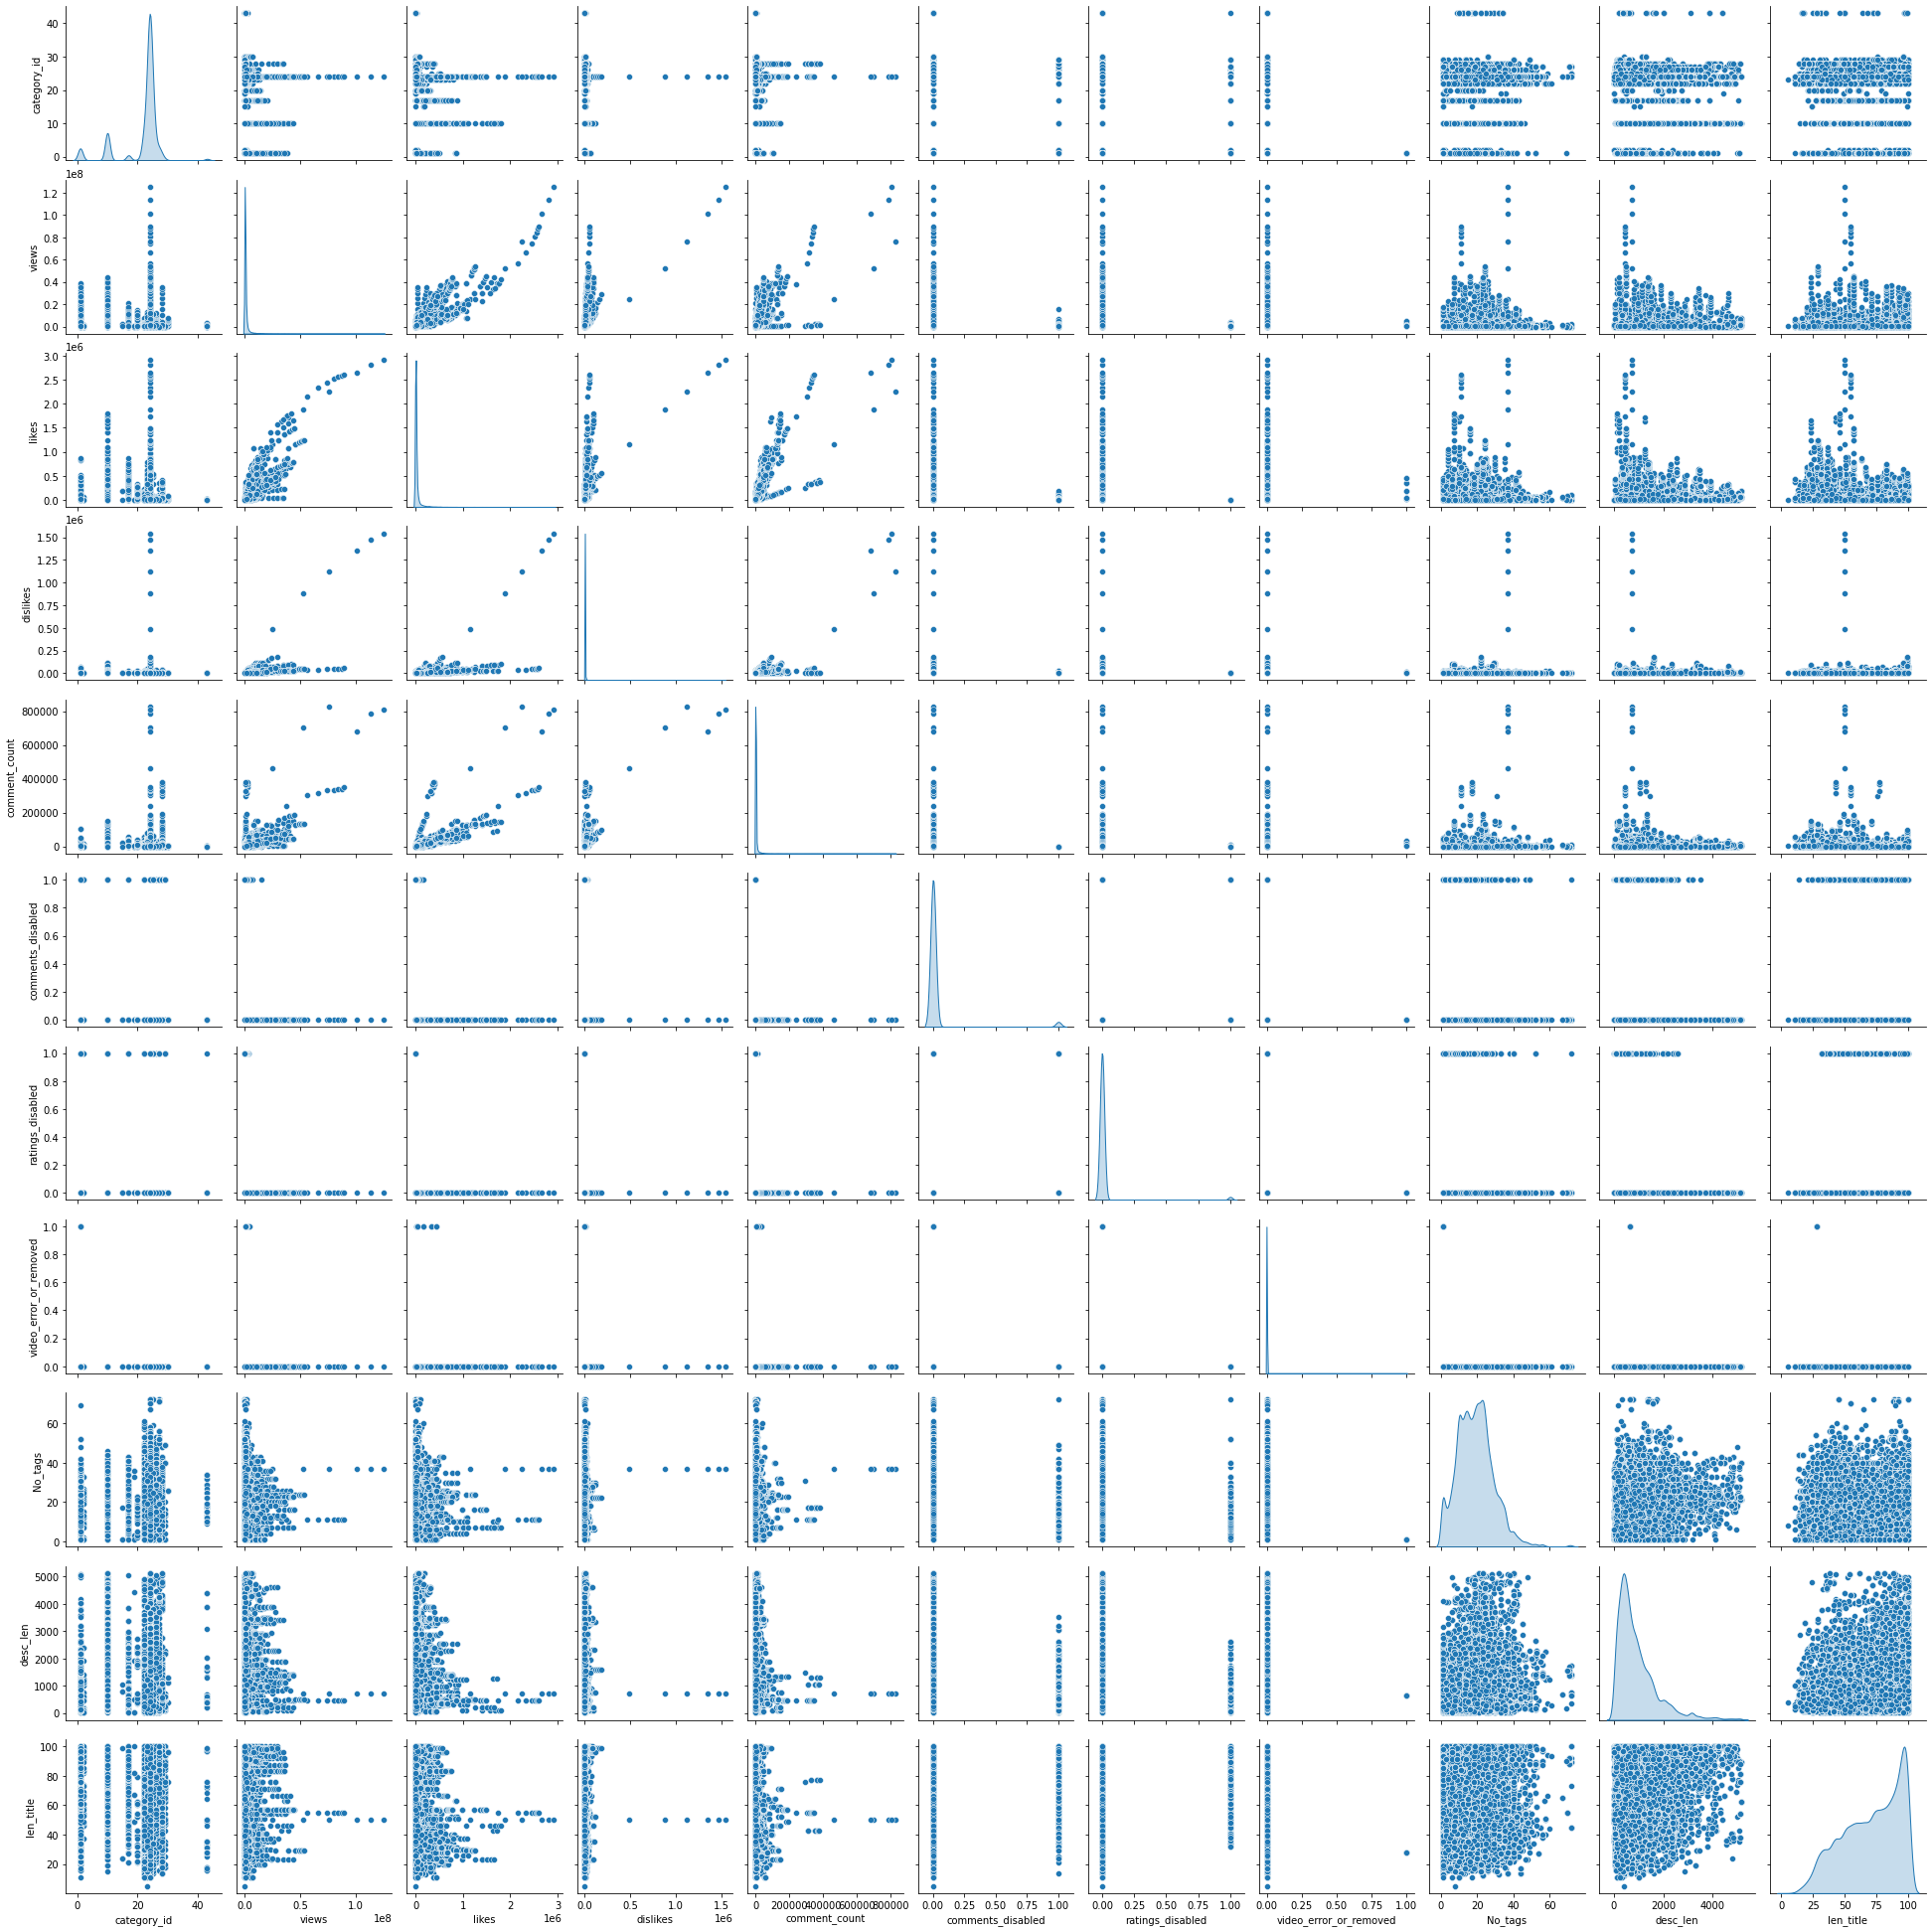

In [95]:
plt.figure(figsize=(10,10))

sns.pairplot(df, diag_kind='kde')

# Data Preparation

**Missing Value**

In [96]:
df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_at                 0
dtype: int64

In [97]:
df.dropna(subset=['description'], inplace=True)

The description columns that has no value is dropped because the value is small if it is replaced with mode, there is a possibility that the description does not represent the uploaded video

In [98]:
df.isnull().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_at                0
dtype: int64

**Duplicate Values**

In [99]:
print(df.duplicated(subset=['trending_date','title']).sum())
print(df.duplicated(subset=['trending_date','title','channel_title']).sum())
print(df.duplicated(subset=['trending_date','title','channel_title','category_id']).sum())
print(df.duplicated(subset=['trending_date','title','channel_title','category_id','publish_at']).sum())


4611
4611
4611
4611


In [100]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   title                   32518 non-null  object        
 2   channel_title           32518 non-null  object        
 3   category_id             32518 non-null  int64         
 4   tags                    32518 non-null  object        
 5   views                   32518 non-null  int64         
 6   likes                   32518 non-null  int64         
 7   dislikes                32518 non-null  int64         
 8   comment_count           32518 non-null  int64         
 9   comments_disabled       32518 non-null  int64         
 10  ratings_disabled        32518 non-null  int64         
 11  video_error_or_removed  32518 non-null  int64         
 12  description             32518 non-null  object

#### Outliers

In [102]:
len(df)

32518

In [103]:
print(f'Number of rows before filtering outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['views', 'likes','dislikes','comment_count','No_tags','desc_len']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df_outlier= df[filtered_entries]

print(f'Number of rows after filtering outliers: {len(df_outlier)}')

Number of rows before filtering outliers: 32518
Number of rows after filtering outliers: 24432


**Normalization**

In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [105]:
df_outlier['category_id'] = MinMaxScaler().fit_transform(df_outlier['category_id'].values.reshape(len(df_outlier), 1))
df_outlier['views'] = MinMaxScaler().fit_transform(df_outlier['views'].values.reshape(len(df_outlier), 1))
df_outlier['likes'] = MinMaxScaler().fit_transform(df_outlier['likes'].values.reshape(len(df_outlier), 1))
df_outlier['dislikes'] = MinMaxScaler().fit_transform(df_outlier['dislikes'].values.reshape(len(df_outlier), 1))
df_outlier['comment_count'] = MinMaxScaler().fit_transform(df_outlier['comment_count'].values.reshape(len(df_outlier), 1))
df_outlier['comments_disabled'] = MinMaxScaler().fit_transform(df_outlier['comments_disabled'].values.reshape(len(df_outlier), 1))
df_outlier['ratings_disabled'] = MinMaxScaler().fit_transform(df_outlier['ratings_disabled'].values.reshape(len(df_outlier), 1))
df_outlier['video_error_or_removed'] = MinMaxScaler().fit_transform(df_outlier['video_error_or_removed'].values.reshape(len(df_outlier), 1))
df_outlier['No_tags'] = MinMaxScaler().fit_transform(df_outlier['No_tags'].values.reshape(len(df_outlier), 1))
df_outlier['desc_len'] = MinMaxScaler().fit_transform(df_outlier['desc_len'].values.reshape(len(df_outlier), 1))
df_outlier['len_title'] = MinMaxScaler().fit_transform(df_outlier['len_title'].values.reshape(len(df_outlier), 1))

**Standardization**

In [106]:
#df_outlier['category_id'] = StandardScaler().fit_transform(df_outlier['category_id'].values.reshape(len(df_outlier), 1))
#df_outlier['views'] = StandardScaler().fit_transform(df_outlier['views'].values.reshape(len(df_outlier), 1))
#df_outlier['likes'] = StandardScaler().fit_transform(df_outlier['likes'].values.reshape(len(df_outlier), 1))
#df_outlier['dislikes'] = StandardScaler().fit_transform(df_outlier['dislikes'].values.reshape(len(df_outlier), 1))
#df_outlier['comment_count'] = StandardScaler().fit_transform(df_outlier['comment_count'].values.reshape(len(df_outlier), 1))
#df_outlier['comments_disabled'] = StandardScaler().fit_transform(df_outlier['comments_disabled'].values.reshape(len(df_outlier), 1))
#df_outlier['ratings_disabled'] = StandardScaler().fit_transform(df_outlier['ratings_disabled'].values.reshape(len(df_outlier), 1))
#df_outlier['video_error_or_removed'] = StandardScaler().fit_transform(df_outlier['video_error_or_removed'].values.reshape(len(df_outlier), 1))
#df_outlier['No_tags'] = StandardScaler().fit_transform(df_outlier['No_tags'].values.reshape(len(df_outlier), 1))
#df_outlier['desc_len'] = StandardScaler().fit_transform(df_outlier['desc_len'].values.reshape(len(df_outlier), 1))
#df_outlier['len_title'] = StandardScaler().fit_transform(df_outlier['len_title'].values.reshape(len(df_outlier), 1))

**Feature encoding**

In [107]:
df_outlier[cats].describe()

,trending_date,title,channel_title,tags,description,publish_at
count,24432,24432,24432,24432,24432,24432
unique,205,13894,1288,10388,11480,13656
top,2018-01-25 00:00:00,Nandhini | Today @ 9 pm | Sun TV,Flowers Comedy,[none],Watch Full Episode Here :- \n\nWatch Flowers T...,2018-02-09 05:30:00
freq,171,15,200,909,138,8
first,2017-11-14 00:00:00,NaN,NaN,NaN,NaN,2017-05-27 20:27:30
last,2018-06-14 00:00:00,NaN,NaN,NaN,NaN,2018-06-13 18:05:15


Because there are so many unique values, there will be a lot of one-hot encoding which causes a relatively small impact on data processing

# Feature Engineering

publish_date + publish_time = publish_at (DateTime64[ns])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   title                   32518 non-null  object        
 2   channel_title           32518 non-null  object        
 3   category_id             32518 non-null  int64         
 4   tags                    32518 non-null  object        
 5   views                   32518 non-null  int64         
 6   likes                   32518 non-null  int64         
 7   dislikes                32518 non-null  int64         
 8   comment_count           32518 non-null  int64         
 9   comments_disabled       32518 non-null  int64         
 10  ratings_disabled        32518 non-null  int64         
 11  video_error_or_removed  32518 non-null  int64         
 12  description             32518 non-null  object

In [109]:
df[cats].describe()

,trending_date,title,channel_title,tags,description,publish_at
count,32518,32518,32518,32518,32518,32518
unique,205,16402,1390,12452,13979,16024
top,2017-12-23 00:00:00,Nandhini | Today @ 9 pm | Sun TV,VikatanTV,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-04-21 13:30:01
freq,199,15,208,1027,150,13
first,2017-11-14 00:00:00,NaN,NaN,NaN,NaN,2017-05-27 20:27:30
last,2018-06-14 00:00:00,NaN,NaN,NaN,NaN,2018-06-13 18:05:15


In [110]:
# drop redundant nums
df_drop = df_outlier.drop(columns = ['title','tags','description'])
df_final = df_drop.drop(columns = ['comment_count'])


In [111]:
df_final.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_at
1,2017-11-14,HJ NEWS,0.571429,0.350268,0.024842,0.408495,1.0,0.0,0.0,0.418605,0.890176,0.557895,2017-11-13 05:43:56
2,2017-11-14,TFPC,0.547619,0.280873,0.067969,0.109806,0.0,0.0,0.0,0.302326,0.191294,0.557895,2017-11-12 15:48:08
4,2017-11-14,Filmylooks,0.547619,0.274913,0.016629,0.132399,0.0,0.0,0.0,0.232558,0.299521,0.873684,2017-11-13 01:14:16
8,2017-11-14,Top Telugu Media,0.547619,0.068251,0.017575,0.023949,0.0,0.0,0.0,0.465116,0.202077,0.968421,2017-11-13 04:42:26
12,2017-11-14,ABN Telugu,0.571429,0.090879,0.024200,0.023949,1.0,0.0,0.0,0.441860,0.341454,0.842105,2017-11-13 09:51:59


In [112]:
df_final['channel_title'].value_counts()

Flowers Comedy         200
ETV Plus India         195
V6 News Telugu         189
etvteluguindia         187
VikatanTV              186
                      ... 
Wide Angle Pictures      1
starjalshaindia          1
iQlikchannel             1
Aap Ka Video             1
জীবন-সমস্যার সমাধান      1
Name: channel_title, Length: 1288, dtype: int64

In [113]:
df_final.isin(['zeemarathi']).any()

trending_date             False
channel_title              True
category_id               False
views                     False
likes                     False
dislikes                  False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
No_tags                   False
desc_len                  False
len_title                 False
publish_at                False
dtype: bool

In [114]:
df_final = df_final[~(df_final['channel_title']=='VitaliUS EN')]
df_final = df_final[~(df_final['channel_title']=='DREAMS N BEYOND')]
df_final = df_final[~(df_final['channel_title']=='zeemarathi')]

# Split Data

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def matrics_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24242 entries, 1 to 36769
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           24242 non-null  datetime64[ns]
 1   channel_title           24242 non-null  object        
 2   category_id             24242 non-null  float64       
 3   views                   24242 non-null  float64       
 4   likes                   24242 non-null  float64       
 5   dislikes                24242 non-null  float64       
 6   comments_disabled       24242 non-null  float64       
 7   ratings_disabled        24242 non-null  float64       
 8   video_error_or_removed  24242 non-null  float64       
 9   No_tags                 24242 non-null  float64       
 10  desc_len                24242 non-null  float64       
 11  len_title               24242 non-null  float64       
 12  publish_at              24242 non-null  dateti

In [117]:
from sklearn.model_selection import train_test_split
x = df_final.drop(columns = ['views','publish_at','trending_date','channel_title'])
y = df_final[['views']]

xtrain, xtest, ytrain, ytest = train_test_split (x , y, test_size = 0.3, random_state = 29)

In [118]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(16969, 9)
(16969, 1)
(7273, 9)
(7273, 1)


# Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit (xtrain, ytrain)

pred = regressor.predict (xtest)
matrics_evaluation (regressor, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.09
RMSE: 0.13
R2 score: 0.50


In [120]:
print("train Accuracy : ",regressor.score(xtrain,ytrain))
print("test Accuracy : ",regressor.score(xtest,ytest))

train Accuracy :  0.47669975296461176
test Accuracy :  0.4957029929940534


# RIDGE

In [121]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

pred = ridge_model.predict(xtest)
matrics_evaluation(ridge_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.09
RMSE: 0.13
R2 score: 0.50


## HYPERPARAMETER RIDGE

In [122]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2', n_iter = 100)

#Fitting Model
best_model = clf.fit(xtrain, ytrain)
pred = best_model.predict (xtest)
matrics_evaluation(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.09
RMSE: 0.13
R2 score: 0.50


In [123]:
print("train Accuracy : ",best_model.score(xtrain,ytrain))
print("test Accuracy : ",best_model.score(xtest,ytest))

train Accuracy :  0.47669917599379086
test Accuracy :  0.49567629315781403


# LASSO

In [124]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

pred = lasso_model.predict(xtest)
matrics_evaluation(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.14
RMSE: 0.19
R2 score: -0.00


In [125]:
print("train Accuracy : ",lasso_model.score(xtrain,ytrain))
print("test Accuracy : ",lasso_model.score(xtest,ytest))

train Accuracy :  0.0
test Accuracy :  -0.0006181302641303787


## HYPERPARAMETER LASSO

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha, selection=selection)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2', n_iter = 100)

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

pred = best_model.predict(xtest)
matrics_evaluation(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.14
RMSE: 0.18
R2 score: 0.05


In [127]:
print('best alpha :', best_model.best_estimator_.get_params()['alpha'])
print('best selection :', best_model.best_estimator_.get_params()['selection'])

best alpha : 0.02
best selection : cyclic


In [128]:
print("train Accuracy : ",best_model.score(xtrain,ytrain))
print("test Accuracy : ", best_model.score(xtest,ytest))

train Accuracy :  0.047772771363331246
test Accuracy :  0.04743351667418405


# ELSATIC NET

In [129]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

pred = elasticnet_model.predict(xtest)
matrics_evaluation(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.14
RMSE: 0.19
R2 score: -0.00


## HYPERPARAMETER TUNING ELASTIC NET

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
model = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2', n_iter = 1000)

#Fitting Model
best_model = model.fit(xtrain, ytrain)
pred = best_model.predict(xtest)
matrics_evaluation (best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.09
RMSE: 0.13
R2 score: 0.50


In [131]:
print('best alpha :', best_model.best_estimator_.get_params()['alpha'])
print('best l1_ratio :', best_model.best_estimator_.get_params()['l1_ratio'])

best alpha : 0.0001
best l1_ratio : 0.66


In [132]:
print("train Accuracy : ",best_model.score(xtrain,ytrain))
print("test Accuracy : ", best_model.score(xtest,ytest))

train Accuracy :  0.4766712223589974
test Accuracy :  0.49548523071744666
